In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
%matplotlib inline
plt.style.use('seaborn')
import bz2

In [ ]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings.sample.csv

In [ ]:
!bzip2 -f bookings.sample.csv

In [ ]:
#cuento numero de lineas
! bzcat bookings.sample.csv.bz2 | wc -l

In [ ]:
#ahora con python
import bz2
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')

In [ ]:
#EN python se hará así
fileBz2=bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2')
k=0
for line in fileBz2:
    k+=1
print(k)



In [ ]:
#importante cerrar archivo
fileBz2.closed

In [ ]:
#mas elegante 
with bz2.BZ2File('/home/dsc/Downloads/bookings.sample.csv.bz2') as fileBz2:
    k=0
    for line in fileBz2:
        k+=1
        
print(k)

#la mejor forma de hacerlo

# Ejercicio 2

# Sample

In [ ]:
!bzcat /home/dsc/Data/challenge/bookings.csv.bz2 | head -10000 > bookings.sample.csv

In [ ]:
import pandas as pd
DATA=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.sample.csv',sep='^')

In [ ]:
lista_columnas=[]
for i in DATA.columns:
    lista_columnas.append(i.strip())

In [ ]:
DATA.columns=lista_columnas

In [ ]:
DATA['rloc'].nunique()

In [ ]:
lista=[]
for i in DATA.columns:
    A=DATA[i].isnull().sum()
    lista.append(A)
    
    

In [ ]:
sum(lista)
#no hay nulos 


In [ ]:
#personas en el aeropuerto
personas_aeropuerto=DATA.groupby(['arr_port'])['pax'].sum()

In [ ]:
personas_aeropuerto.sort_values(ascending=False).head(10).to_csv('001.csv')

# Big File

In [ ]:
from tqdm import tqdm

In [ ]:
lista=[]
for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/bookings.csv.bz2',sep='^',chunksize=10000)):
    lista.append(len(chunk))
    
    lista_columnas=[]
    for i in chunk.columns:
        lista_columnas.append(i.strip())
        
    chunk.columns=lista_columnas
    
    chunk=chunk[['arr_port','pax']]
    
    #chunk['pax']=chunk['pax'].abs()
    
    
    personas_aeropuerto=chunk.groupby(['arr_port'])['pax'].sum().to_frame()
    
    
    if 'group_personas_aeropuerto' in locals():
        group_personas_aeropuerto=group_personas_aeropuerto.append(personas_aeropuerto)
    else:
        group_personas_aeropuerto=pd.DataFrame()

longitud = sum(lista)
grupo=group_personas_aeropuerto.groupby(['arr_port']).sum()
grupo=grupo.sort_values(by='pax',ascending=False).head(10)


In [ ]:
grupo['pax']=grupo['pax'].apply(int)
grupo

# 3 ejercicio

In [1]:
!bzcat /home/dsc/Data/challenge/searches.csv.bz2 | head -50000 > searches.sample.csv


bzcat: I/O or other error, bailing out.  Possible reason follows.
bzcat: Broken pipe
	Input file = /home/dsc/Data/challenge/searches.csv.bz2, output file = (stdout)


In [2]:
import pandas as pd
Searches=pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/searches.sample.csv',sep='^')

In [3]:
Searches.columns

Index(['Date', 'Time', 'TxnCode', 'OfficeID', 'Country', 'Origin',
       'Destination', 'RoundTrip', 'NbSegments', 'Seg1Departure',
       'Seg1Arrival', 'Seg1Date', 'Seg1Carrier', 'Seg1BookingCode',
       'Seg2Departure', 'Seg2Arrival', 'Seg2Date', 'Seg2Carrier',
       'Seg2BookingCode', 'Seg3Departure', 'Seg3Arrival', 'Seg3Date',
       'Seg3Carrier', 'Seg3BookingCode', 'Seg4Departure', 'Seg4Arrival',
       'Seg4Date', 'Seg4Carrier', 'Seg4BookingCode', 'Seg5Departure',
       'Seg5Arrival', 'Seg5Date', 'Seg5Carrier', 'Seg5BookingCode',
       'Seg6Departure', 'Seg6Arrival', 'Seg6Date', 'Seg6Carrier',
       'Seg6BookingCode', 'From', 'IsPublishedForNeg', 'IsFromInternet',
       'IsFromVista', 'TerminalID', 'InternetOffice'],
      dtype='object')

In [5]:
lista_columnas=[]
for i in Searches.columns:
    lista_columnas.append(i.strip())
    
Searches.columns=lista_columnas

In [6]:
Searches=Searches[['Date','Destination']]

In [7]:

Searches['YearMonth']=Searches['Date'].str[0:7]

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
Searches=Searches[['YearMonth','Destination']]
Searches=Searches[(Searches['Destination']=='MAD')|(Searches['Destination']=='BCN')|(Searches['Destination']=='AGP')]

In [10]:
aggregated=Searches.groupby(['YearMonth','Destination'])['Destination'].agg(['count']).reset_index()

In [11]:
aggregated

,YearMonth,Destination,count
0,2013-01,AGP,169
1,2013-01,BCN,517
2,2013-01,MAD,425
3,2013-02,AGP,97
4,2013-02,BCN,357
5,2013-02,MAD,284


In [12]:
import seaborn as sns
sns.lineplot(data=aggregated,x='YearMonth',y='count',hue='Destination')
from tqdm import tqdm


In [ ]:
##quito duplicados

In [49]:
all_chunks=pd.DataFrame()

for chunk in tqdm(pd.read_csv('/home/dsc/Data/DSMaster/DSMaster/searches.csv.bz2',sep='^',chunksize=400000)):
    
    lista_columnas=[]
    for i in chunk.columns:
        lista_columnas.append(i.strip())
        
    chunk.columns=lista_columnas
    
    all_chunks=all_chunks.append(chunk)
    
    all_chunks.drop_duplicates(inplace=True)
    
    break
     
    

0it [00:00, ?it/s]


In [53]:
Searches=all_chunks
Searches=Searches[['Date','Destination']]

In [54]:
Searches['YearMonth']=Searches['Date'].str[0:7]

/home/dsc/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [55]:
Searches=Searches[['YearMonth','Destination']]
Searches=Searches[(Searches['Destination']=='MAD')|(Searches['Destination']=='BCN')|(Searches['Destination']=='AGP')]

In [56]:
aggregated=Searches.groupby(['YearMonth','Destination'])['Destination'].agg(['count']).reset_index()

[Text(0, 0, '2013-01'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-01'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-02'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-03'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-04'),
 Text(0, 0, '2013-04')]

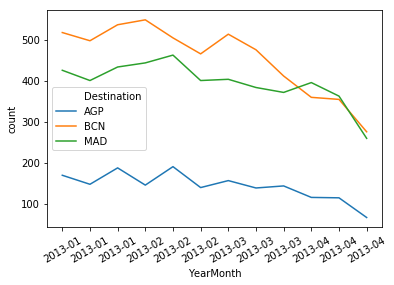

In [60]:
g=sns.lineplot(data=aggregated,x='YearMonth',y='count',hue='Destination')
g.set_xticklabels(rotation=30,labels=aggregated['YearMonth'])

# 4 ejercicio